<a href="https://colab.research.google.com/github/sandhyajnv/Deep-Learning-/blob/main/Regression_of_dl_assignment_1_layer_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/Group11/Group11/Regression/UnivariateData/11.csv', 'r') as f:
    data = f.readlines()

Xu = [float(line.replace('\n', '').split(',')[0]) for line in data]
Yu = [float(line.replace('\n', '').split(',')[1]) for line in data]

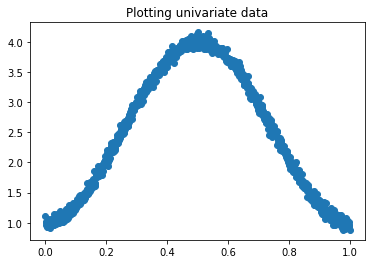

In [ ]:
plt.title("Plotting univariate data")
plt.scatter(Xu,Yu)

In [ ]:
with open('/content/drive/MyDrive/Group11/Group11/Regression/BivariateData/11.csv', 'r') as f:
    data = f.readlines()

Xb = [float(line.replace('\n', '').split(',')[0]) for line in data]
Yb = [float(line.replace('\n', '').split(',')[1]) for line in data]
Zb = [float(line.replace('\n', '').split(',')[2]) for line in data]

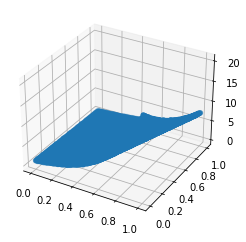

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(Xb, Yb, Zb);

In [ ]:
index60=int(0.6*len(Xu))
index20=int(0.2*len(Xu))
XTrain1D=Xu[:index60]
YTrain1D=Yu[:index60]
XVal1D=Xu[index60:index60+index20]
YVal1D=Yu[index60:index60+index20]
XTest1D=Xu[index60+index20:]
YTest1D=Yu[index60+index20:]

In [ ]:
XTrain2D=Xb[:index60]
YTrain2D=Yb[:index60]
XVal2D=Xb[index60:index60+index20]
YVal2D=Yb[index60:index60+index20]
XTest2D=Xb[index60+index20:]
YTest2D=Yb[index60+index20:]

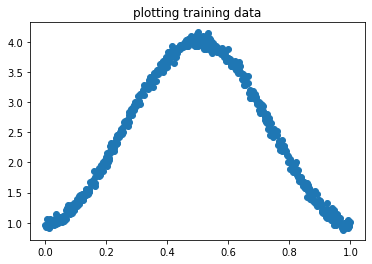

In [ ]:
plt.title("plotting training data")
plt.scatter(XTrain1D,YTrain1D)

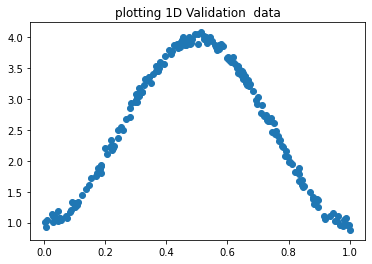

In [ ]:
plt.title("plotting 1D Validation  data")
plt.scatter(XVal1D,YVal1D)

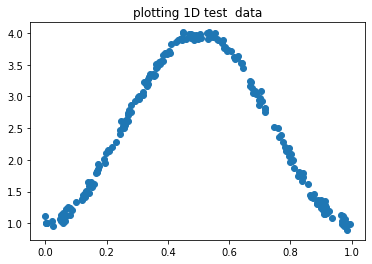

In [ ]:
plt.title("plotting 1D test  data")
plt.scatter(XTest1D,YTest1D)

In [ ]:
def initial_para(n_neuron):
  
  n_input=1
  n_output=1
  W1=np.random.rand(n_neuron,n_input)-0.5
  b1=np.random.rand(n_neuron,1)-0.5
  W2=np.random.rand(1,n_neuron)-0.5
  b2=np.random.rand(n_output,1)-0.5
  
  
  return(W1,W2,b1,b2)

In [ ]:
def sigmoid(v):
  return(1/(1+np.exp(-v)))

In [ ]:
def inst_error(e):
    return sum(0.5*(e)**2)

In [ ]:
def train_sgd(X,Y,nodes):
  W1,W2,b1,b2=initial_para(nodes)
 
  
  print(W1.shape,W2.shape,b1.shape,b2.shape)
  iter=1000
  eta=0.1
  Error=[]
  epoch=[]

  for i in range(iter):
    E=[]
    for j in range(len(X)):
      x=X[j]
     
      
      

      
      p1=np.add(W1*x,b1)
      
     
      
      

      
      A1=sigmoid(p1)
     
      
      
      p2=np.add(np.matmul(W2,A1),b2)
      
     
 
      
     
      p2=p2.flatten()
      A2=p2[0]
      #print("A3:",A3)
     
      error=(A2-Y[j])
   
      e=0.5*error**2
      
      
      E.append(e)
      
      dW2=np.dot(A1.T,error)
      
      v1=np.multiply(A1*(1-A1),W2.T)
      dW1=np.dot((error*x),v1)
   
      
      
      
      
      
      
      db1=np.dot(error,np.multiply(A1*(1-A1),W2.T))
      
      error=np.array(error)
      error=error.reshape((1,1))
      db2=error
     
      b2=b2-eta*db2
      b1=b1-eta*db1
      
      W2=W2-eta*dW2
      W1=W1-eta*dW1
      
     
    
      
      
     
    avg_err=sum(E)/len(E)
    Error.append(avg_err)
    epoch.append(i+1)
    if(i%10==0):
      print("ERROR:",avg_err)
    
  return(W1,W2,b1,b2,Error,epoch)

In [ ]:
number_nodes=3

In [ ]:
W1,W2,b1,b2,Error,epoch=train_sgd(XTrain1D,YTrain1D,number_nodes)

(3, 1) (1, 3) (3, 1) (1, 1)
ERROR: 0.6516768018015807
ERROR: 0.6035996583935603
ERROR: 0.4970974956843934
ERROR: 0.005933106044604293
ERROR: 0.005096492506063338
ERROR: 0.0046252708163701485
ERROR: 0.004277413315352015
ERROR: 0.004004936861848433
ERROR: 0.0037853040103343026
ERROR: 0.0036053165190491126
ERROR: 0.0034561840515320674
ERROR: 0.0033315412647502807
ERROR: 0.00322654263517315
ERROR: 0.0031374011022268456
ERROR: 0.0030611172703474934
ERROR: 0.0029952970206377273
ERROR: 0.0029380177933201507
ERROR: 0.0028877272404460473
ERROR: 0.002843165822140251
ERROR: 0.00280330761770051
ERROR: 0.002767314918104685
ERROR: 0.0027345031197240945
ERROR: 0.0027043132512350894
ERROR: 0.0026762901450262376
ERROR: 0.0026500648056147383
ERROR: 0.0026253399402362946
ERROR: 0.0026018779201006305
ERROR: 0.0025794906568404686
ERROR: 0.002558031028276989
ERROR: 0.0025373855887285755
ERROR: 0.0025174683661682087
ERROR: 0.0024982155925957505
ERROR: 0.002479581242929343
ERROR: 0.0024615332769052627
ERROR: 

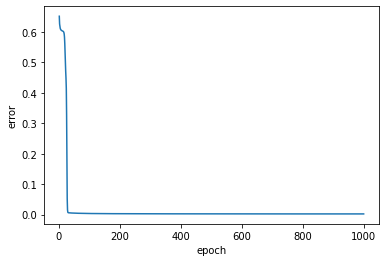

In [ ]:
plt.xlabel("epoch")
plt.ylabel("error")
plt.plot(epoch,Error)


In [ ]:
def classifier(W1,W2,b1,b2,data):
  output=[]
  for i in range(len(data)):
    
    x=data[i]
      
    p1=np.add(W1*x,b1)
      
     
      
      

      
    A1=sigmoid(p1)
     
      
      
    p2=np.add(np.matmul(W2,A1),b2)
      
     
 
      
     
    p2=p2.flatten()
    A2=p2[0]
    output.append(A2)

  return(output)

In [ ]:
opValidation=classifier(W1,W2,b1,b2,XVal1D)

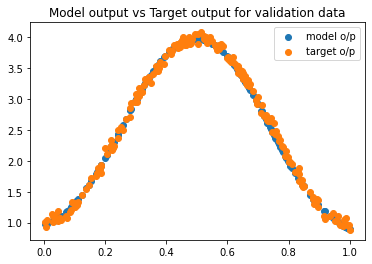

In [ ]:
plt.title("Model output vs Target output for validation data")
plt.scatter(XVal1D,opValidation,label="model o/p")
plt.scatter(XVal1D,YVal1D,label="target o/p")

plt.legend()

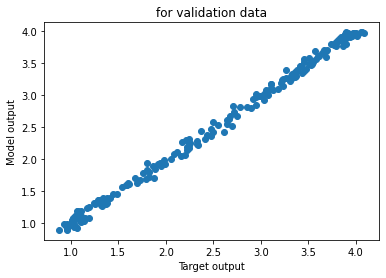

In [ ]:
plt.title("for validation data")
plt.xlabel("Target output")
plt.ylabel("Model output")
plt.scatter(YVal1D,opValidation)

In [ ]:
opTest=classifier(W1,W2,b1,b2,XTest1D)

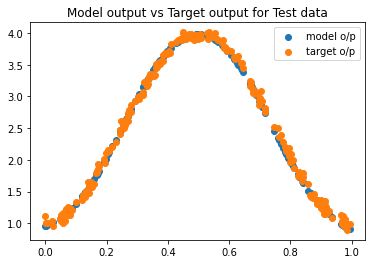

In [ ]:
plt.title("Model output vs Target output for Test data")
plt.scatter(XTest1D,opTest,label="model o/p")
plt.scatter(XTest1D,YTest1D,label="target o/p")
plt.legend()

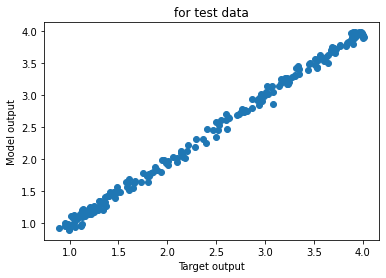

In [ ]:
plt.title("for test data")
plt.xlabel("Target output")
plt.ylabel("Model output")
plt.scatter(YTest1D,optest)

In [ ]:
opTrain=classifier(W1,W2,b1,b2,XTrain1D)

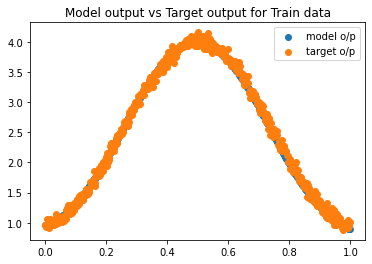

In [ ]:
plt.title("Model output vs Target output for Train data")
plt.scatter(XTrain1D,opTrain,label="model o/p")
plt.scatter(XTrain1D,YTrain1D,label="target o/p")
plt.legend()

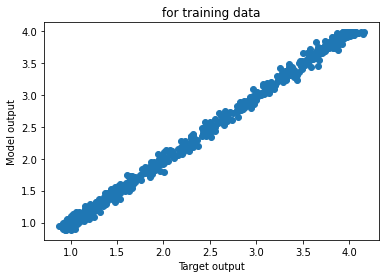

In [ ]:
plt.title("for training data")
plt.xlabel("Target output")
plt.ylabel("Model output")
plt.scatter(YTrain1D,opTr)

In [ ]:
def each_node_output(W1,W2,b1,b2,data,nodes):
  l1=np.empty((nodes,len(data)))
  
  op=np.empty((1,len(data)))
  for i in range(len(data)):
    
    x=data[i]
      
    p1=np.add(W1*x,b1)
      
     
      
      

      
    A1=sigmoid(p1)
     
      
      
    p2=np.add(np.matmul(W2,A1),b2)
      
     
 
      
     
    p2=p2.flatten()
    A2=p2[0]
  
    l1[:,i]= A1.flatten()
    
    op[:,i]=A2

  return(l1,op)






In [ ]:
layer1_nodev,opv=each_node_output(W1,W2,b1,b2,XVal1D,number_nodes)
# print(layer1_node.shape)
# r=layer1_node[0,:]


In [ ]:
layer1_nodeTr,opTr=each_node_output(W1,W2,b1,b2,XTrain1D,number_nodes)

In [ ]:
layer1_nodetest,optest=each_node_output(W1,W2,b1,b2,XTest1D,number_nodes)

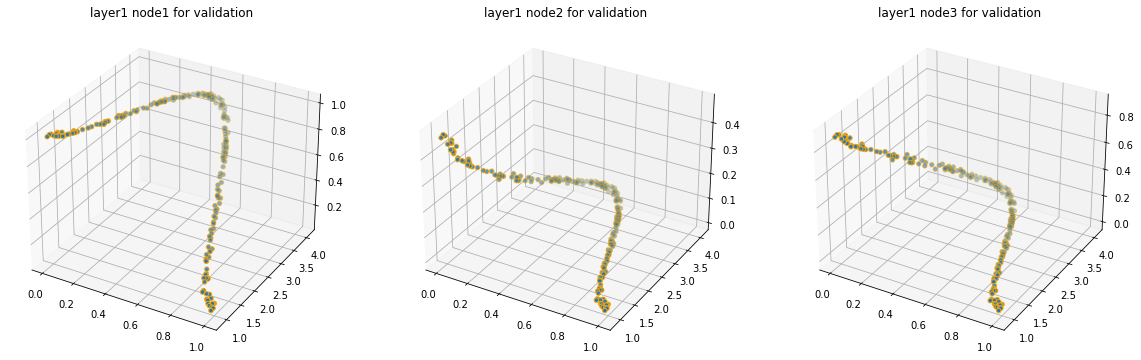

In [ ]:
# for validation data

j=0
#Z=opTr[i,:]
fig, ax = plt.subplots(1,3,figsize=(20,20),subplot_kw=dict(projection='3d'))
for i in [0,1,2]:
  sc1 = ax[j].scatter(XVal1D, YVal1D,layer1_nodev[j,:],edgecolors="orange")
  ax[j].set_title('layer1 node{} for validation'.format(i+1))
  j=j+1

# sc2 = ax[1].scatter(X, Y, Z,"blue")
# ax[1].set_title('layer 1 node 2')



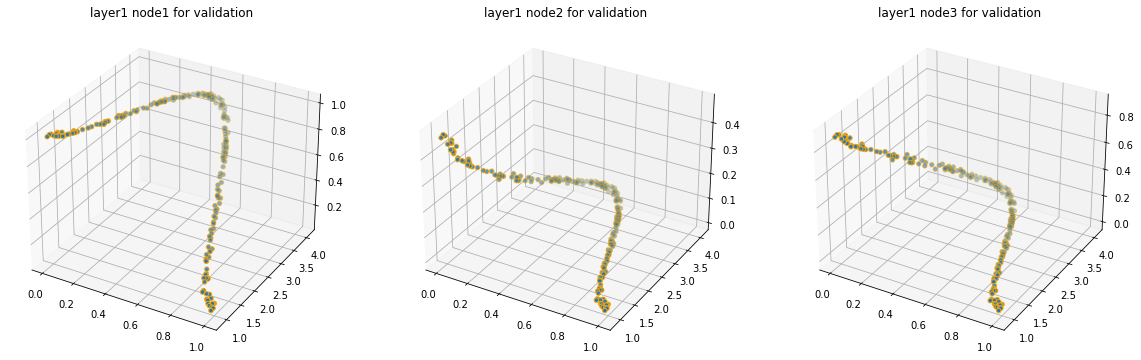

In [ ]:
# for validation data
j=0
#Z=opTr[i,:]
fig, ax = plt.subplots(1,3,figsize=(20,20),subplot_kw=dict(projection='3d'))
for i in [0,1,2]:
  sc1 = ax[j].scatter(XVal1D, YVal1D,layer1_nodev[j,:],edgecolors="orange")
  ax[j].set_title('layer1 node{} for validation'.format(i+1))
  j=j+1

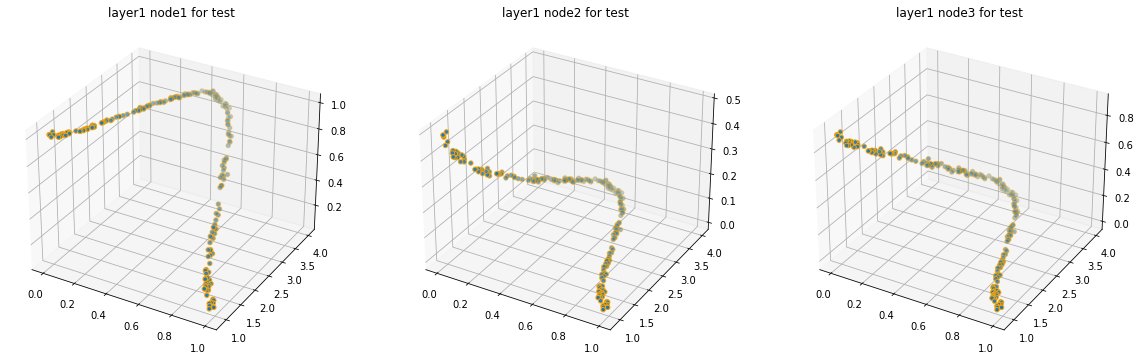

In [ ]:
# for test data
j=0
#Z=opTr[i,:]
fig, ax = plt.subplots(1,3,figsize=(20,20),subplot_kw=dict(projection='3d'))
for i in [0,1,2]:
  sc1 = ax[j].scatter(XTest1D, YTest1D,layer1_nodetest[j,:],edgecolors="orange")
  ax[j].set_title('layer1 node{} for test'.format(i+1))
  j=j+1

In [ ]:
# for test data 
j=0
#Z=opTr[i,:]
fig, ax = plt.subplots(1,4,figsize=(20,20),subplot_kw=dict(projection='3d'))
for i in [0,1,2,3]:
  sc1 = ax[j].scatter(XTest1D, YTest1D,layer1_nodetest[j,:],edgecolors="orange")
  ax[j].set_title('layer1 node{} for validation'.format(i+1))
  j=j+1

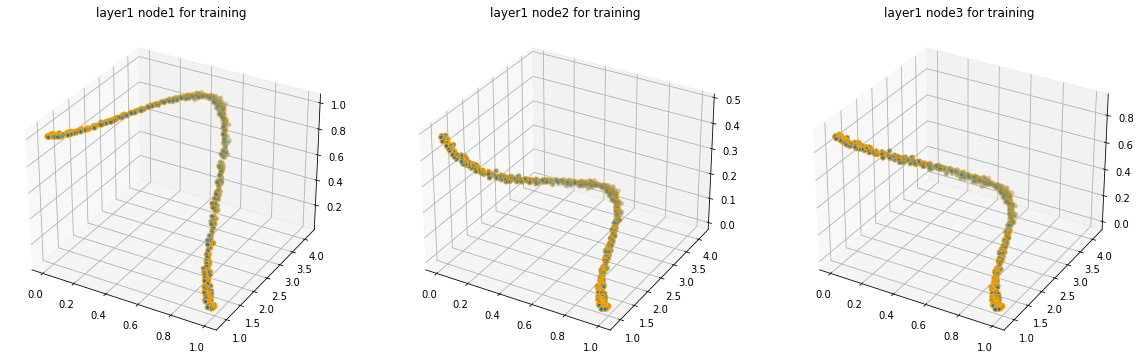

In [ ]:
# for training data 
j=0
#Z=opTr[i,:]
fig, ax = plt.subplots(1,3,figsize=(20,20),subplot_kw=dict(projection='3d'))
for i in [0,1,2]:
  sc1 = ax[j].scatter(XTrain1D, YTrain1D,layer1_nodeTr[j,:],edgecolors="orange")
  ax[j].set_title('layer1 node{} for training'.format(i+1))
  j=j+1

In [ ]:
# for training data 
j=0
#Z=opTr[i,:]
fig, ax = plt.subplots(1,4,figsize=(20,20),subplot_kw=dict(projection='3d'))
for i in [4,5,6,7]:
  sc1 = ax[j].scatter(XTrain1D, YTrain1D,layer1_nodeTr[j,:],edgecolors="orange")
  ax[j].set_title('layer1 node{} for validation'.format(i+1))
  j=j+1

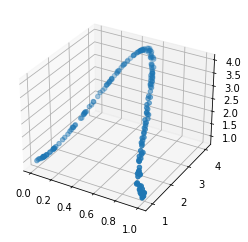

In [ ]:
# for validation data output node


ax = plt.axes(projection='3d')
ax.scatter3D(XVal1D, YVal1D, opv);

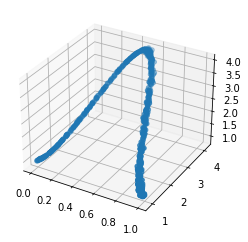

In [ ]:
# output node for training data
ax = plt.axes(projection='3d')
ax.scatter3D(XTrain1D, YTrain1D, opTr);

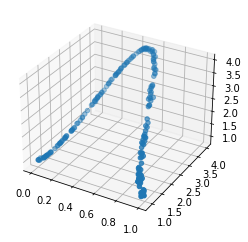

In [ ]:
# output node for test data
ax = plt.axes(projection='3d')
ax.scatter3D(XTest1D, YTest1D, optest);